In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [ ]:
from nltk.corpus import stopwords
from nltk.util import ngrams

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
import nltk
nltk.download('stopwords')
from collections import defaultdict
from collections import Counter
plt.style.use('ggplot')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re
from nltk.tokenize import word_tokenize
import gensim
import string

In [ ]:
import warnings
warnings.simplefilter('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/combined.csv', lineterminator='\n')

In [ ]:
df.head()

,Datetime,Tweet Id,Text
0,2021-11-09 11:47:26+00:00,1458038518031081474,"#twosuns and #immaru' today 9november2021, 4pm..."
1,2021-11-09 11:39:03+00:00,1458036406836596737,@GHMCOnline @HMWSSBOnline @KTRTRS What is th...
2,2021-11-09 03:29:58+00:00,1457913327544414212,"Also, Vizag already faced Hud Hud. Amaravati i..."
3,2021-11-08 18:40:43+00:00,1457780135776555010,@Xtraordinary_11 @Mayankkk98 @TrivikramanN @Th...
4,2021-11-08 14:55:10+00:00,1457723377158819844,"""looks like the rains / floods are going to be..."


In [ ]:
df.shape

(61356, 3)

In [ ]:
a = df.loc[1272].to_string()
print(a)

Datetime                            2021-04-03 04:09:04+00:00
Tweet Id                                  1378197834843922435
Text        "In recent times, cities like Hyderabad,Bangal...


In [ ]:
regex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
match = re.sub(regex_pattern,'',a) #replaces pattern with ''
print(match)

Datetime                            2021-04-03 04:09:04+00:00
Tweet Id                                  1378197834843922435
Text        "In recent times, cities like Hyderabad,Bangal...


In [ ]:
a = df.loc[0].to_string()
print(a)

Datetime                            2021-11-09 11:47:26+00:00
Tweet Id                                  1458038518031081474
Text        #twosuns and #immaru' today 9november2021, 4pm...


In [ ]:
pattern = re.compile(r'(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?')
match = re.sub(pattern,'',a)
print(match)

Datetime                            2021-11-09 11:47:26+00:00
Tweet Id                                  1458038518031081474
Text        #twosuns and #immaru' today 9november2021, 4pm...


In [ ]:
a = df.loc[3].to_string()
print(a)

Datetime                            2021-11-08 18:40:43+00:00
Tweet Id                                  1457780135776555010
Text        @Xtraordinary_11 @Mayankkk98 @TrivikramanN @Th...


In [ ]:
re_list = ['@[A-Za-z0–9_]+', '#']
combined_re = re.compile( '|'.join( re_list) )
match = re.sub(combined_re,'',a)
print(match)

Datetime                            2021-11-08 18:40:43+00:00
Tweet Id                                  1457780135776555010
Text        11 8  ...


In [ ]:
a = df.loc[27].to_string()
print(a)

Datetime                            2021-10-28 09:09:52+00:00
Tweet Id                                  1453650211876708356
Text        @Nabarun204 @ShekharGupta @sanjeevsanyal @madh...


In [ ]:
from bs4 import BeautifulSoup
del_amp = BeautifulSoup(a, 'lxml')
del_amp_text = del_amp.get_text()
print(del_amp_text)

Datetime                            2021-10-28 09:09:52+00:00
Tweet Id                                  1453650211876708356
Text        @Nabarun204 @ShekharGupta @sanjeevsanyal @madh...


In [ ]:
from nltk.tokenize import WordPunctTokenizer
token = WordPunctTokenizer()
def cleaning_tweets(t):
    del_amp = BeautifulSoup(t, 'lxml')
    del_amp_text = del_amp.get_text()
    del_link_mentions = re.sub(combined_re, '', del_amp_text)
    del_emoticons = re.sub(regex_pattern, '', del_link_mentions)
    lower_case = del_emoticons.lower()
    words = token.tokenize(lower_case)
    result_words = [x for x in words if len(x) > 2]
    return (" ".join(result_words)).strip()

In [ ]:
print("Cleaning the tweets...\n")
cleaned_tweets = []
for i in range(0,61356): #3000 columns in our dataframe
    if( (i+1)%100 == 0 ):
        print("Tweets {} of {} have ben processed".format(i+1,61356))                                                                  
    cleaned_tweets.append(cleaning_tweets((df.Text[i])))

Cleaning the tweets...

Tweets 100 of 61356 have ben processed
Tweets 200 of 61356 have ben processed
Tweets 300 of 61356 have ben processed
Tweets 400 of 61356 have ben processed
Tweets 500 of 61356 have ben processed
Tweets 600 of 61356 have ben processed
Tweets 700 of 61356 have ben processed
Tweets 800 of 61356 have ben processed
Tweets 900 of 61356 have ben processed
Tweets 1000 of 61356 have ben processed
Tweets 1100 of 61356 have ben processed
Tweets 1200 of 61356 have ben processed
Tweets 1300 of 61356 have ben processed
Tweets 1400 of 61356 have ben processed
Tweets 1500 of 61356 have ben processed
Tweets 1600 of 61356 have ben processed
Tweets 1700 of 61356 have ben processed
Tweets 1800 of 61356 have ben processed
Tweets 1900 of 61356 have ben processed
Tweets 2000 of 61356 have ben processed
Tweets 2100 of 61356 have ben processed
Tweets 2200 of 61356 have ben processed
Tweets 2300 of 61356 have ben processed
Tweets 2400 of 61356 have ben processed
Tweets 2500 of 61356 have

In [ ]:
string = pd.Series(cleaned_tweets).str.cat(sep=' ')

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
stopwords.update(["http co","https"]) 

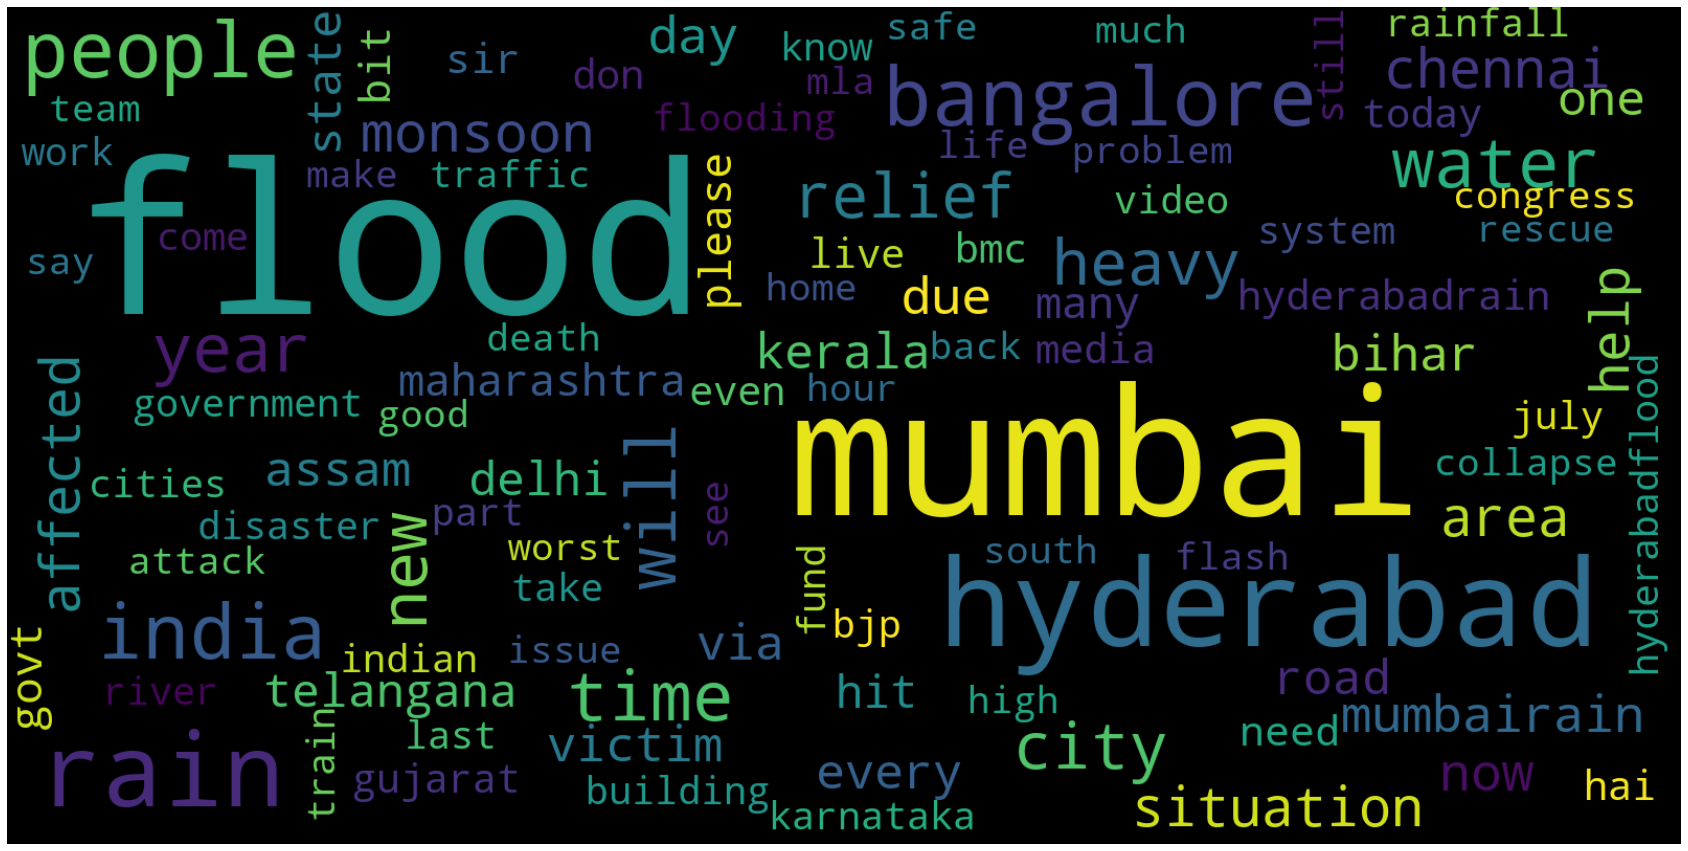

In [ ]:
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=100,collocations=False, background_color='black').generate(string)
plt.figure(figsize=(30,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

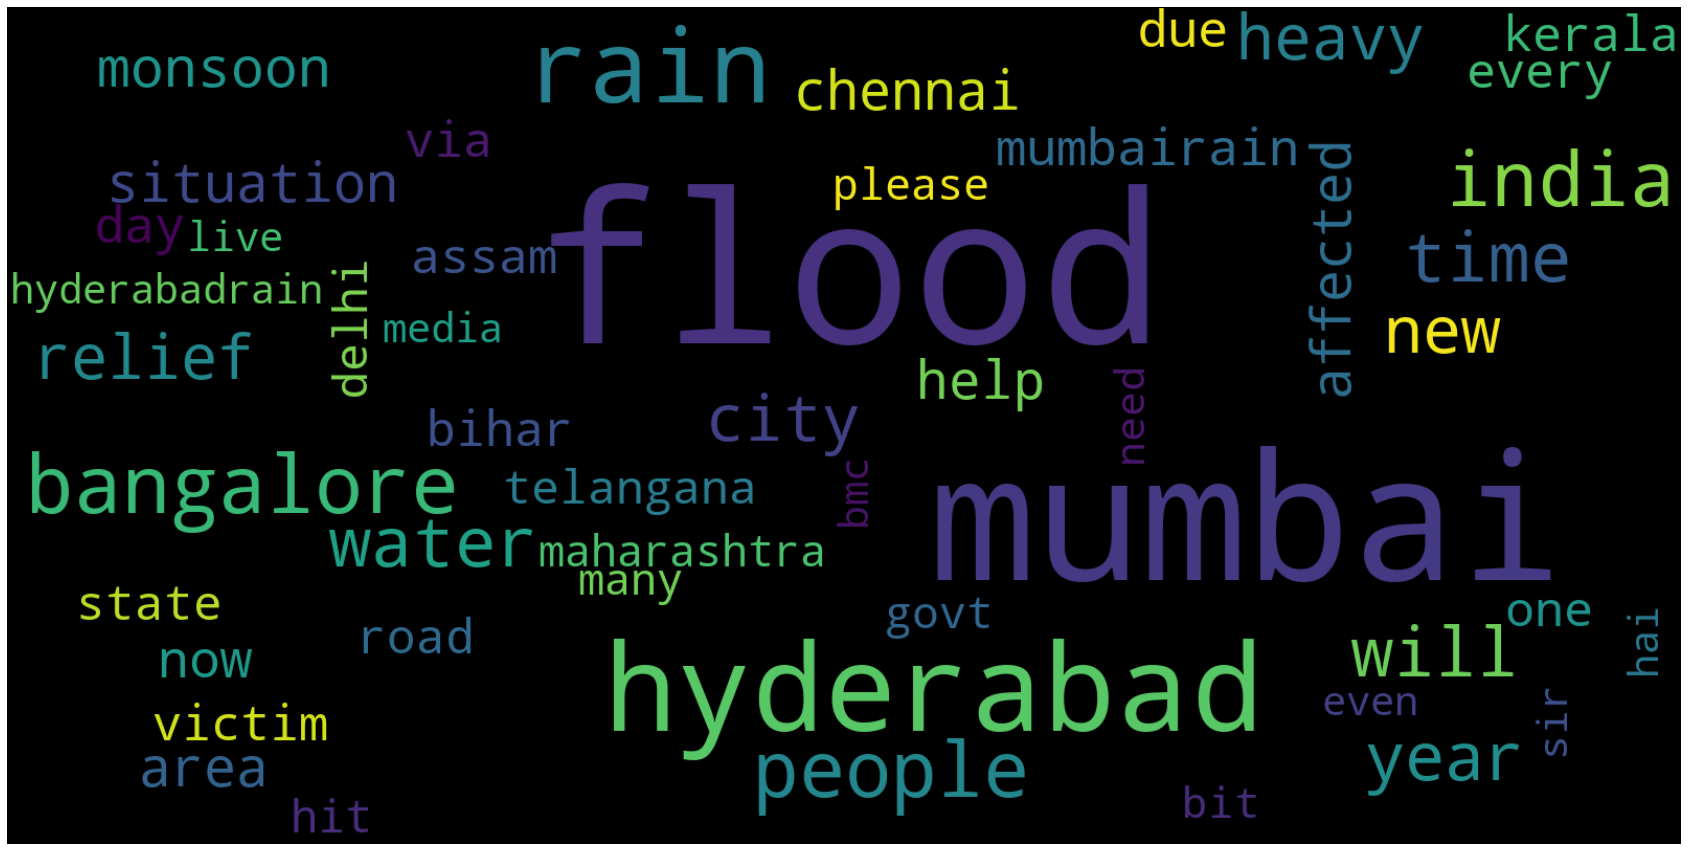

In [ ]:
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False, background_color='black').generate(string)
plt.figure(figsize=(30,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
pd.Series(cleaned_tweets).head()

0    twosuns and immaru today 9november2021 4pm hyd...
1    what the plan for hyderabad floods which are c...
2    also vizag already faced hud hud amaravati flo...
3    ghmc the time when hyderabad saw floods also t...
4    looks like the rains floods are going round th...
dtype: object

In [ ]:
pd.Series(cleaned_tweets).to_csv('processed_data_new.csv',index = False)

In [ ]:
tweets = pd.read_csv('/content/drive/MyDrive/data/processed_data_new.csv', lineterminator='\n')

In [ ]:
tweets

,0
0,twosuns and immaru today 9november2021 4pm hyd...
1,what the plan for hyderabad floods which are c...
2,also vizag already faced hud hud amaravati flo...
3,ghmc the time when hyderabad saw floods also t...
4,looks like the rains floods are going round th...
...,...
61351,watching docmentary mumbai mega flood nat geo
61352,this mumbai flood documentary must have happen...
61353,went from oprah national geographic show real ...
61354,flood mumbai chennai and now london flood2 urb...


In [ ]:
tweets.rename(columns={'0': 'new_c'}, inplace=True)

In [ ]:
tweets

,new_c
0,twosuns and immaru today 9november2021 4pm hyd...
1,what the plan for hyderabad floods which are c...
2,also vizag already faced hud hud amaravati flo...
3,ghmc the time when hyderabad saw floods also t...
4,looks like the rains floods are going round th...
...,...
61351,watching docmentary mumbai mega flood nat geo
61352,this mumbai flood documentary must have happen...
61353,went from oprah national geographic show real ...
61354,flood mumbai chennai and now london flood2 urb...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer   

bow_vectorizer = CountVectorizer(stop_words=stopwords, lowercase=True, max_df=10, min_df=0.5)
bow_matrix = bow_vectorizer.fit_transform(tweets)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
lda_bow  = LDA(n_components=5, random_state=42) 
lda_bow.fit(bow_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In [ ]:
#lda_bow.transform(bow_matrix[:2])

array([[0.2, 0.2, 0.2, 0.2, 0.2]])